In [82]:
## Notebook 1: Create new model for every training, train the model as the sliding window for 1 week
## In this notebook we use job history data for Mar 2022
## Lookback for queue minutes = 35
## We train the model for one week (i.e 7 days) and then predict queue minutes for the jobs in the 8th day.
## Then we slide the window one day, and then train again for next 7 days and predict the 8th day
## For every training, we create the same model and do the training from the scratch
### Input file : ../data/processed/lookback35_anon_feb1_aug1.csv
### Result file: ../data/processed/nn_sliding_window_lookback35_anon_march22.csv

In [13]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [14]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [15]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

import pandas as pd

In [16]:
def get_jobs_in_range(dfq,start,end):
    df1=dfq.query('submit >= @start and submit < @end')
    return df1

In [17]:
# weekly prediction for the month of March
df_arr={}
df_feb_aug = create_input_data.read_data(csv_file_name="../data/processed/lookback35_anon_feb1_aug1.csv", parse_dates_col=[4,5,6])


#df_arr['1wee']= get_jobs_in_range(df_feb_aug,"2022-03-01","2022-03-07")
#df_arr['april']= get_jobs_in_range(df_feb_aug,"2022-04-01","2022-05-01")


In [18]:
## Train 1 week and predict one day
start_train_weeks=[]
end_train_weeks=[]
predict_day=[]
day1 = pd.Timestamp("2022-03-01")
start_train_weeks.append(day1)
#day8 = day1_mar + pd.Timedelta("7 days")
next_week = day1
day2 = day1
for i in range(0,25):
    next_week=next_week + pd.Timedelta("7 days")
    end_train_weeks.append(next_week)
    predict_day.append(next_week)
    day2 = day2 + pd.Timedelta("1 days")
    next_week = day2
    start_train_weeks.append(next_week)
for i in range(0,25):
    print("start: " + str(start_train_weeks[i]) + ": " + str(start_train_weeks[i].day_name()) + " end: " 
          + str(end_train_weeks[i]) + " : " + str(end_train_weeks[i].day_name()))
    print("predict: " + str(predict_day[i].day_name()))

start: 2022-03-01 00:00:00: Tuesday end: 2022-03-08 00:00:00 : Tuesday
predict: Tuesday
start: 2022-03-02 00:00:00: Wednesday end: 2022-03-09 00:00:00 : Wednesday
predict: Wednesday
start: 2022-03-03 00:00:00: Thursday end: 2022-03-10 00:00:00 : Thursday
predict: Thursday
start: 2022-03-04 00:00:00: Friday end: 2022-03-11 00:00:00 : Friday
predict: Friday
start: 2022-03-05 00:00:00: Saturday end: 2022-03-12 00:00:00 : Saturday
predict: Saturday
start: 2022-03-06 00:00:00: Sunday end: 2022-03-13 00:00:00 : Sunday
predict: Sunday
start: 2022-03-07 00:00:00: Monday end: 2022-03-14 00:00:00 : Monday
predict: Monday
start: 2022-03-08 00:00:00: Tuesday end: 2022-03-15 00:00:00 : Tuesday
predict: Tuesday
start: 2022-03-09 00:00:00: Wednesday end: 2022-03-16 00:00:00 : Wednesday
predict: Wednesday
start: 2022-03-10 00:00:00: Thursday end: 2022-03-17 00:00:00 : Thursday
predict: Thursday
start: 2022-03-11 00:00:00: Friday end: 2022-03-18 00:00:00 : Friday
predict: Friday
start: 2022-03-12 00:00

In [19]:
df_predict={}
for i in range(0,24):
    df_arr['week'+ str(i+1)]= get_jobs_in_range(df_feb_aug,start_train_weeks[i], end_train_weeks[i])
    df_predict['day'+ str(i+1)] = get_jobs_in_range(df_feb_aug,predict_day[i], predict_day[i+1])

In [20]:
week_names=[]
for i in range(0,24):
    week_names.append('week'+str(i+1))
print(week_names)    

['week1', 'week2', 'week3', 'week4', 'week5', 'week6', 'week7', 'week8', 'week9', 'week10', 'week11', 'week12', 'week13', 'week14', 'week15', 'week16', 'week17', 'week18', 'week19', 'week20', 'week21', 'week22', 'week23', 'week24']


In [80]:
#df_arr['week25']

In [22]:
df_predict['day1']

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,...,qm26,qm27,qm28,qm29,qm30,qm31,qm32,qm33,qm34,qm35
44522,9264440,1e94032cb929373ffe8edc8761fcf62741fc8312d6140d...,e518824e2cd46680ad7e25759f168bb4affb5afbffb5b0...,COMPLETED,2022-03-08 00:00:56,2022-03-08 06:15:04,2022-03-09 10:39:33,120,5,2880,...,0,0,0,0,0,0,0,0,0,0
44523,9264443,5315c0d39d9b80958306da0d58d4c80f23511dbf320c59...,13f12669b2c1d64b36b4333e0df18511fec7136beb13a9...,COMPLETED,2022-03-08 00:03:05,2022-03-08 00:39:52,2022-03-08 02:37:27,256,4,120,...,17,14,14,14,14,14,14,14,14,6
44524,9264453,41d85cea6d357d42e23d07231155f073580245cef425a1...,c171b107c6f21114432f6b057a4911169e3df44f35e38a...,COMPLETED,2022-03-08 00:06:22,2022-03-08 06:15:29,2022-03-08 09:32:32,1,1,2880,...,17,17,14,14,14,14,14,14,14,14
44525,9264493,ea61bb2d95cf16714cedc5e4ec63ffbc5834968418511c...,1d4712c264238a06f8d4af03724155dc82e877f41430eb...,COMPLETED,2022-03-08 00:18:44,2022-03-08 01:38:42,2022-03-08 02:42:35,68,1,180,...,17,17,17,17,17,17,17,14,14,14
44526,9264494,ea61bb2d95cf16714cedc5e4ec63ffbc5834968418511c...,1d4712c264238a06f8d4af03724155dc82e877f41430eb...,COMPLETED,2022-03-08 00:19:07,2022-03-08 01:38:42,2022-03-08 03:15:25,68,1,180,...,17,17,17,17,17,17,17,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45869,9269007,645c687165564fa805fd7245fbb41102cb3ccc1d45aac5...,ba26d9b434c5fa30f5fee7024a1a70f0e30f44be856ed8...,COMPLETED,2022-03-08 23:37:00,2022-03-09 03:02:49,2022-03-09 03:12:16,256,8,120,...,0,2,0,19,17,3,22,18,13,79
45870,9269008,645c687165564fa805fd7245fbb41102cb3ccc1d45aac5...,ba26d9b434c5fa30f5fee7024a1a70f0e30f44be856ed8...,COMPLETED,2022-03-08 23:37:06,2022-03-09 03:03:24,2022-03-09 03:20:02,256,8,120,...,0,2,0,19,17,3,22,18,13,79
45871,9269017,100dd935adb232830f84e5a1a9ce5540deeffb477b5205...,8d798419e042f4a78bfa4af0adbeb70aab558ae3ad0209...,COMPLETED,2022-03-08 23:40:18,2022-03-08 23:45:50,2022-03-08 23:54:54,10,1,120,...,9,20,0,2,0,19,17,3,22,18
45872,9269048,ea61bb2d95cf16714cedc5e4ec63ffbc5834968418511c...,1d4712c264238a06f8d4af03724155dc82e877f41430eb...,COMPLETED,2022-03-08 23:54:42,2022-03-09 02:38:21,2022-03-09 09:06:48,252,4,720,...,16,2,0,0,9,0,18,1,9,20


In [23]:
def train_test_data(month,df_arr):
    X_historydata = df_arr[month]
    ## remove default columns
    df = build_features.remove_default_cols(df_arr[month])
    Y_waittimedata = df['queue_minutes']
    X_historydata= build_features.remove_cols(df,['queue_minutes','run_minutes'])
    return X_historydata, Y_waittimedata

In [24]:
# from sklearn.linear_model import LinearRegression
# def train_model_LR(X_historydata_norm, Y_waittimedata_train):
#     lreg = LinearRegression().fit(X_historydata_norm, Y_waittimedata_train)
#     model_score = lreg.score(X_historydata_norm, Y_waittimedata_train)
#     return lreg, model_score

In [25]:
from importlib import reload
reload(train_model)
def train_model_NN(X_historydata_norm, Y_waittimedata_train):
    epochs=500
    batch_size=32
    validation_spilt=0.2
    model = train_model.create_default_model(input_shape=42)
    early_stopping_cb = train_model.set_early_stopping()
    model, hist = train_model.train_model_no_shuffle(X_historydata_norm, Y_waittimedata_train, model, early_stopping_cb,epochs=epochs, batch_size=batch_size, validation_spilt=0.2)
    return model, hist

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def predict_evaluate(model,scaler,X_historydata_test,Y_waittimedata_test):
    y_pred=model.predict(scaler.transform(X_historydata_test))
    y_pred = np.where(y_pred<0,0,y_pred)
    r2s = r2_score(Y_waittimedata_test.to_numpy(),y_pred)
    mse = mean_squared_error(Y_waittimedata_test.to_numpy(),y_pred,squared=False)
    mae = mean_absolute_error(Y_waittimedata_test.to_numpy(),y_pred)
    return y_pred, r2s, mse, mae

In [27]:
from importlib import reload
reload(analyze_pred)
reload(build_features)


<module 'features.build_features' from '/home/jovyan/work/src/features/build_features.py'>

In [34]:
from importlib import reload
import numpy as np
reload(analyze_pred)
reload(build_features)
reload(train_model)
results=[]
for i in range(0,24):
    result = {}
    result['train_week']= start_train_weeks[i]
    result['predict_day']= predict_day[i]
    X_historydata_train, Y_waittimedata_train = train_test_data(week_names[i],df_arr)
    X_historydata_test, Y_waittimedata_test = train_test_data('day'+str(i+1),df_predict)
    X_historydata_norm, scaler = build_features.standardization(X_historydata_train)
    
    model, hist = train_model_NN(X_historydata_norm, Y_waittimedata_train)
    model_metrics = predict_model.compare_metrics(model,scaler,X_historydata_test, Y_waittimedata_test)
    y_pred, r2s, mse, mae = predict_evaluate(model,scaler,X_historydata_test,Y_waittimedata_test)
    provision_time = 20
    tolerance_factor = 3
    provision_time, n_scheduled, n_missed, no_missed, wrongly_scheduled, t_num = analyze_pred.analysis_short(0,Y_waittimedata_test.shape[0], Y_waittimedata_test, y_pred.ravel(),
                                                                                                          provision_time=provision_time, tolerance_factor=tolerance_factor)
    
    result['ideally_sched'] = n_scheduled
    result['missed'] = n_missed

    result['wrongly_sched'] = wrongly_scheduled
    result['total_num'] = t_num
    result['%_wrongly_sched'] = (wrongly_scheduled/t_num)*100
    result['%_ideally_sched'] = (n_scheduled/t_num)*100
    result['%_missed_opp.'] = (n_missed/n_scheduled)*100
    result['t_wrong_sched_%'] = (wrongly_scheduled/(wrongly_scheduled + no_missed))*100
    result['r2s'] = r2s
    result['mse'] = mse
    result['mae'] = mae
    result['model_mae'] = model_metrics['mae']
    result['model_mse'] = model_metrics['loss']
    #result['model'] = lreg
    result['y_pred'] = y_pred
    #result['not_missed'] = no_missed
    #result['provision_time'] = provision_time
    results.append(result)
    #print(result)
    #print("\n")


Model: "queueTime"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 30)                1290      
                                                                 
 Hidden2 (Dense)             (None, 100)               3100      
                                                                 
 Hidden3 (Dense)             (None, 100)               10100     
                                                                 
 Output (Dense)              (None, 1)                 101       
                                                                 
Total params: 14,591
Trainable params: 14,591
Non-trainable params: 0
_________________________________________________________________
None
43/43 [==============================] - 0s 553us/step - loss: 27967.4785 - mae: 134.6109
loss — -> 27967.478515625
mae — -> 134.61090087890625
43/43 [=============================

In [35]:
reload(analyze_pred)
rdf = analyze_pred.add_all_to_df(results)

In [36]:
rdf

,train_week,predict_day,ideally_sched,missed,wrongly_sched,total_num,%_wrongly_sched,%_ideally_sched,%_missed_opp.,t_wrong_sched_%,r2s,mse,mae,model_mae,model_mse,y_pred
0,2022-03-01,2022-03-08,691,0,659,1352,48.742604,51.109467,0.000000,48.814815,0.359524,167.234819,134.610899,134.610901,2.796748e+04,"[[535.4758], [185.68094], [513.5377], [185.033..."
1,2022-03-02,2022-03-09,953,0,2467,3437,71.777713,27.727669,0.000000,72.134503,-0.351955,201.507942,122.794524,122.816154,4.060626e+04,"[[228.86249], [142.62607], [149.65175], [492.9..."
2,2022-03-03,2022-03-10,905,0,2247,3152,71.288071,28.711929,0.000000,71.288071,-11.544199,413.879782,290.163553,290.163483,1.712965e+05,"[[210.27115], [120.55074], [203.94568], [204.0..."
3,2022-03-04,2022-03-11,899,37,2006,2954,67.907921,30.433311,4.115684,69.944212,0.265148,208.378954,103.789624,103.789642,4.342179e+04,"[[147.06096], [25.290512], [29.534573], [181.5..."
4,2022-03-05,2022-03-12,461,9,573,1043,54.937680,44.199425,1.952278,55.902439,0.187872,172.837784,139.769655,139.769653,2.987290e+04,"[[177.94681], [177.02304], [470.1731], [177.94..."
5,2022-03-06,2022-03-13,401,44,162,678,23.893805,59.144543,10.972569,31.213873,0.253937,193.026199,152.033295,152.038086,3.725912e+04,"[[500.0656], [69.995056], [469.54376], [469.93..."
6,2022-03-07,2022-03-14,727,68,74,1471,5.030591,49.422162,9.353508,10.095498,0.078148,758.193424,146.217445,146.402298,5.748639e+05,"[[386.72504], [387.10645], [387.4878], [387.86..."
7,2022-03-08,2022-03-15,768,78,223,1533,14.546641,50.097847,10.156250,24.424973,0.021314,1799.496656,289.254208,289.361969,3.238190e+06,"[[432.19983], [42.116943], [324.54916], [370.6..."
8,2022-03-09,2022-03-16,693,0,349,1047,33.333333,66.189112,0.000000,33.493282,0.245273,416.137007,355.176704,355.180328,1.731700e+05,"[[541.44495], [285.9484], [555.2262], [287.146..."
9,2022-03-10,2022-03-17,529,0,248,777,31.917632,68.082368,0.000000,31.917632,0.411138,329.446632,285.791898,285.791901,1.085351e+05,"[[592.52563], [833.67224], [562.0769], [1009.4..."


In [37]:
# write to file
from pathlib import Path  
filepath = Path('../data/processed/nn_sliding_window_lookback35_anon_march22.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
rdf.to_csv(filepath,index=False)

(array([19060., 19064., 19068., 19072., 19076., 19080., 19083.]),
 [Text(19060.0, 0, '2022-03-09'),
  Text(19064.0, 0, '2022-03-13'),
  Text(19068.0, 0, '2022-03-17'),
  Text(19072.0, 0, '2022-03-21'),
  Text(19076.0, 0, '2022-03-25'),
  Text(19080.0, 0, '2022-03-29'),
  Text(19083.0, 0, '2022-04-01')])

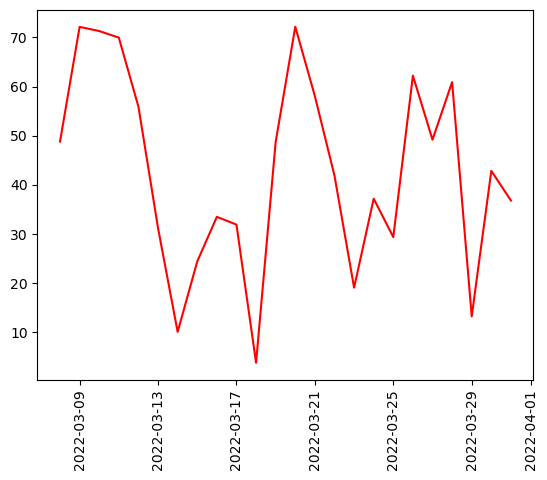

In [40]:
t_wrong_sched= [] 


for i in range(0,24):
    t_wrong_sched.append(results[i]['t_wrong_sched_%'])
plt.plot(predict_day[0:24],t_wrong_sched,'r')
plt.xticks(rotation=90)


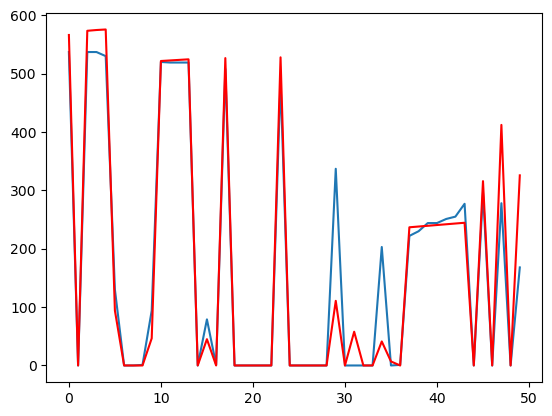

In [41]:
import matplotlib.pyplot as plt
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[150:200])
plt.plot(results[10]['y_pred'][150:200],'r')

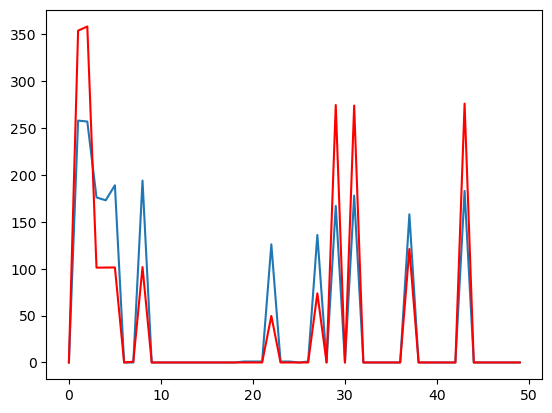

In [42]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[200:250])
plt.plot(results[10]['y_pred'][200:250],'r')

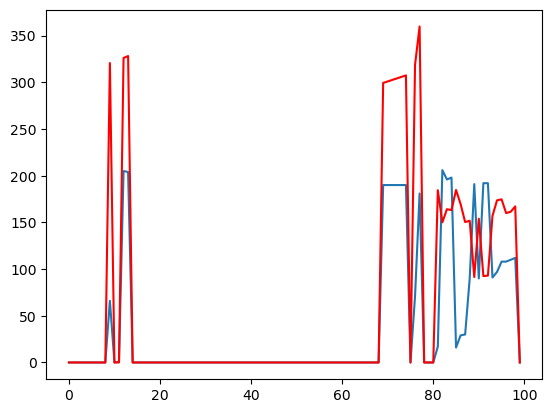

In [43]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[250:350])
plt.plot(results[10]['y_pred'][250:350],'r')

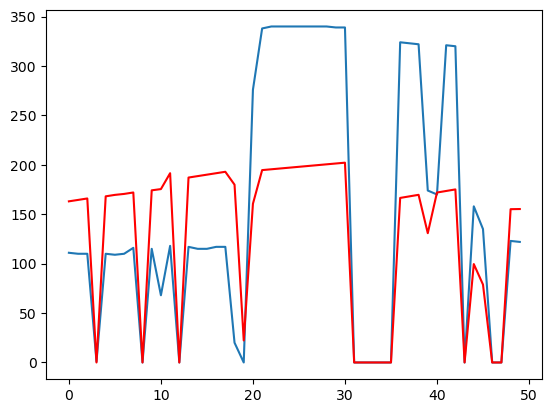

In [44]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[350:400])
plt.plot(results[10]['y_pred'][350:400],'r')

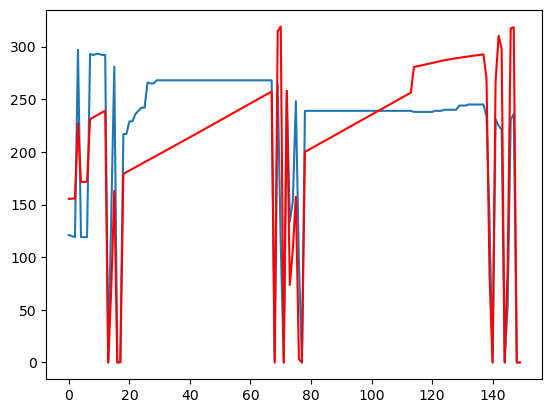

In [57]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[400:550])
plt.plot(results[10]['y_pred'][400:550],'r')

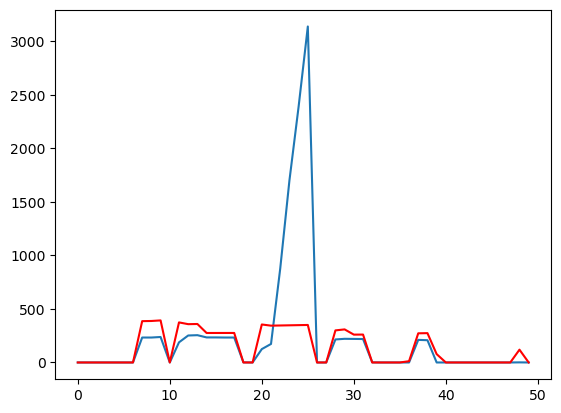

In [59]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[550:600])
plt.plot(results[10]['y_pred'][550:600],'r')

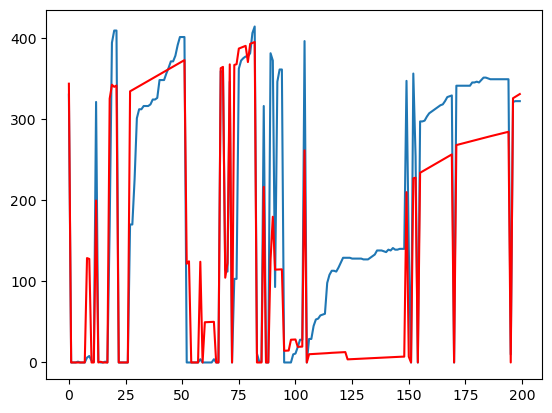

In [60]:
plt.plot(df_predict['day11']['queue_minutes'].to_numpy()[600:800])
plt.plot(results[10]['y_pred'][600:800],'r')

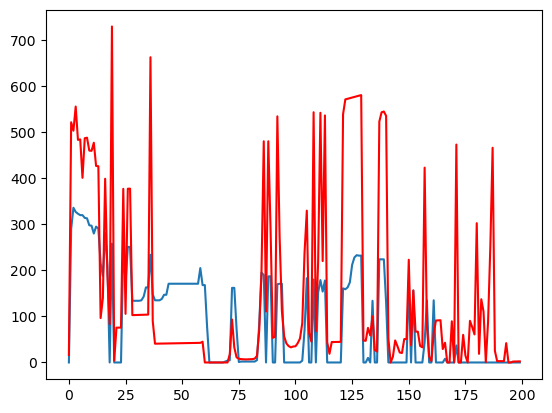

In [49]:
plt.plot(df_predict['day12']['queue_minutes'].to_numpy()[0:200])
plt.plot(results[11]['y_pred'][0:200],'r')

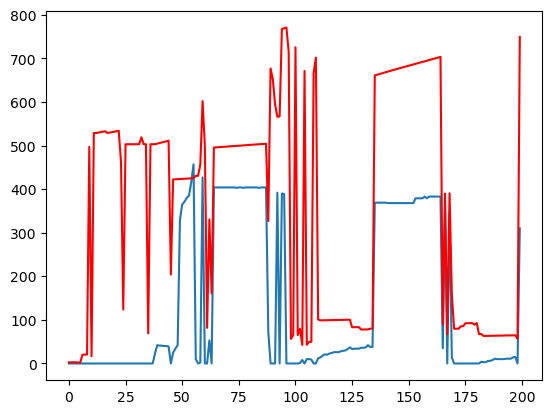

In [50]:
plt.plot(df_predict['day12']['queue_minutes'].to_numpy()[200:400])
plt.plot(results[11]['y_pred'][200:400],'r')

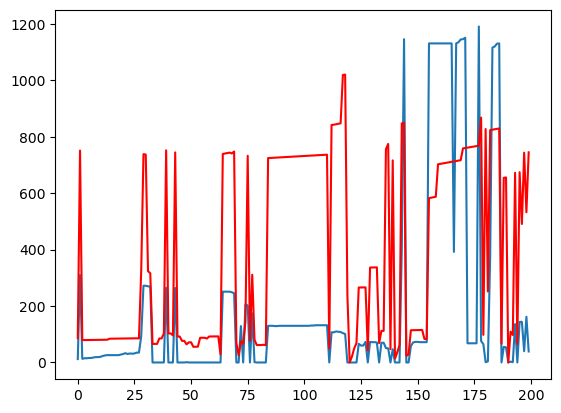

In [51]:
plt.plot(df_predict['day12']['queue_minutes'].to_numpy()[400:600])
plt.plot(results[11]['y_pred'][400:600],'r')

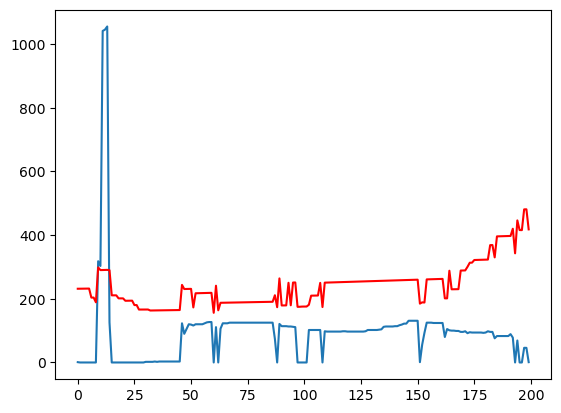

In [62]:
plt.plot(df_predict['day13']['queue_minutes'].to_numpy()[0:200])
plt.plot(results[12]['y_pred'][0:200],'r')

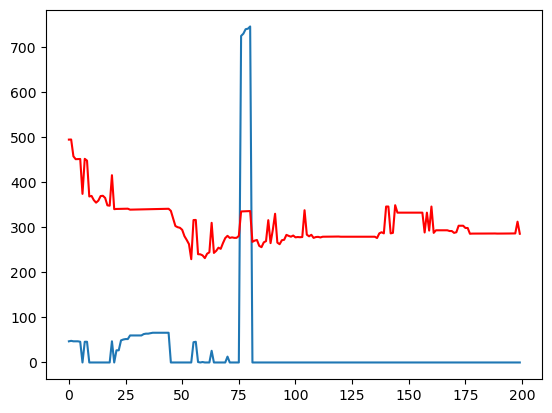

In [63]:
plt.plot(df_predict['day13']['queue_minutes'].to_numpy()[200:400])
plt.plot(results[12]['y_pred'][200:400],'r')

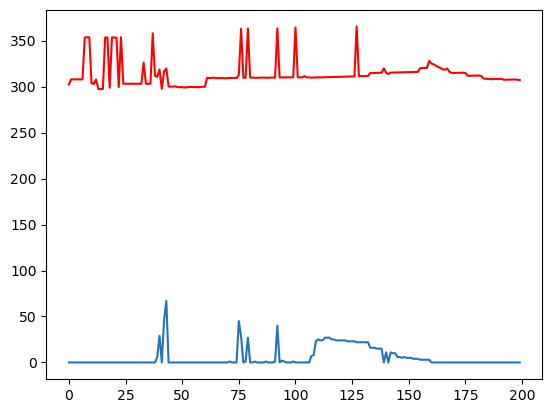

In [64]:
plt.plot(df_predict['day13']['queue_minutes'].to_numpy()[400:600])
plt.plot(results[12]['y_pred'][400:600],'r')

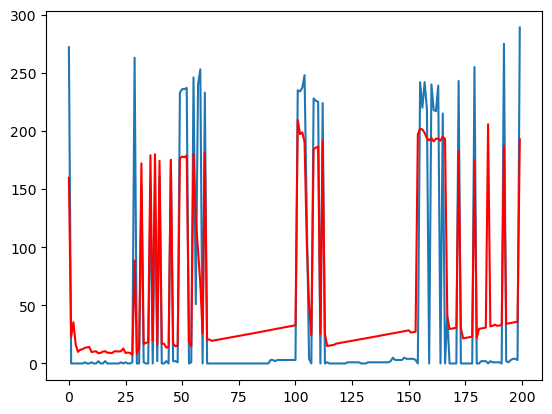

In [79]:
plt.plot(df_predict['day24']['queue_minutes'].to_numpy()[0:200])
plt.plot(results[23]['y_pred'][0:200],'r')